In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import math

path exists: True


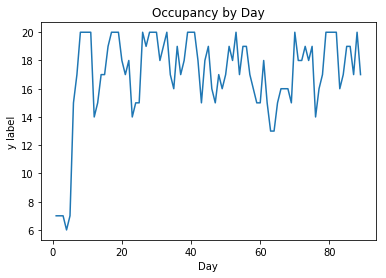

In [2]:
path = '/Users/willyray/git/MainModel/MainModel/events.csv'
print("path exists: %s" %os.path.exists(path))

raw=pd.read_csv(path)

raw.columns = ['time', 'type', 'event']
occupancy = raw[raw['type']=='OCCUPANCY']
occupancy = occupancy.copy(deep=True)
occupancy.count = occupancy.event
occupancy['count'] = pd.to_numeric(occupancy['event'])

fig, ax = plt.subplots()
ax.plot(occupancy['time'], occupancy['count'])
ax.set_title("Occupancy by Day")
ax.set_xlabel('Day')
ax.set_ylabel('y label')
plt.show()

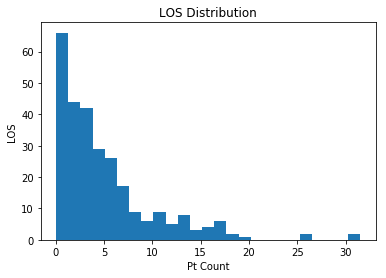

type    ADMISSION   DISCHARGE         los
count  281.000000  281.000000  281.000000
mean    42.657710   47.714375    5.056665
std     25.897977   25.622397    5.222354
min      0.000000    0.277322    0.009476
25%     19.784852   25.516153    1.387061
50%     43.805874   50.242145    3.540764
75%     66.122970   70.324950    6.797802
max     87.789796   89.741669   31.540143


In [3]:
ad_df = raw.loc[raw['type'].isin(['ADMISSION', 'DISCHARGE'])].copy(deep=True)

def parse_patient(event):
    p = re.findall('^\D*(\d*)', event)
    return p[0]
    
ad_df['patient'] = ad_df['event'].apply(parse_patient)
patient_df = pd.pivot_table(ad_df, index=['patient'], values='time', columns=['type',])
patient_df = patient_df.loc[pd.isna(patient_df['DISCHARGE'])==False].copy(deep=True)
patient_df['los'] = patient_df['DISCHARGE'] - patient_df['ADMISSION']
    
fig, ax = plt.subplots()
ax.hist(patient_df['los'], bins=25)
ax.set_title("LOS Distribution")
ax.set_xlabel('Pt Count')
ax.set_ylabel('LOS')
plt.show()
print(patient_df.describe())

In [ ]:
visits = raw.loc[raw["type"].isin(['VISIT'])].copy(deep=True)
visits['day'] = visits['time'].apply(math.floor)

visits_per_day = visits['day'].groupby(visits['day']).count()

print(type(visits_per_day))
print(visits_per_day.head())

fig, ax = plt.subplots()
ax.plot(visits_per_day)
ax.set_xlabel('Days')
ax.set_ylabel('Visits')
ax.set_title('Visits Per Day')
plt.show()

fig, ax = plt.subplots()
ax.hist(visits_per_day, bins=25)
ax.set_xlabel('Days')
ax.set_ylabel('Visits')
ax.set_title('Visits Per Day')
visits_mean = visits_per_day.mean()
ax.axvline(visits_mean, color='k', linestyle='--')
ax.text((visits_mean-40), 20, "Mean: %d" % visits_mean)
plt.show()



